In [1]:
%matplotlib inline
import matplotlib
import csv
matplotlib.style.use('ggplot')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk import word_tokenize
from collections import Counter
from string import punctuation
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import cluster
from sklearn.metrics.pairwise import cosine_similarity
matplotlib.rcParams.update({'figure.autolayout': True})

In [2]:
df = pd.read_csv('HC.csv')

In [3]:
df['historia_clinica'] = df['historia_clinica'].str.replace(',','')
df['historia_clinica']= df['historia_clinica'].str.replace(' S. ','sindrome ')
df['historia_clinica'] = df['historia_clinica'].str.replace('.','')
df['historia_clinica'] = df['historia_clinica'].str.replace(r'\n','')#Formato weka

In [4]:
df['historia_clinica'] = df['historia_clinica'].str.lower().str.replace('años','anos')
df['historia_clinica'] = df['historia_clinica'].str.lower().str.replace('mama','seno')

In [5]:
remove_words = ['paciente','pacientes','gen','secuenciacion','molecular','tipo','mas','de']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
df['historia_clinica'] = df['historia_clinica'].str.replace(pat,' ')

In [6]:
df['historia_clinica']

0        con cuadro clinico compatible con crisis feb...
1      sospecha craneosinostosis por abombamiento fro...
2      tumor maligno   retina   sin riesgo cardiovasc...
3        con crisis compulsivas con crisis donde hubo...
4      prueba para el complejo   esclerosis tuberosa ...
5      sindrome   hipermovilidad miopia degenerativa ...
6                                      fibrosis quistica
7      distrofia muscular progresiva en estudio duche...
8        con evidencia   retinoblatoma bilateral con ...
9                   agamaglobulinemia hereditaria bruton
10     sospecha   enfermedad rara con retraso del neu...
11                                      cancer   seno t3
12                       estudio     esclerosis tuberosa
13     sospecha   pseudoacondroplasia   con acortamie...
14       con antecedentes   enfermedad metabolica no ...
15                           epilepsia mioclonica severa
16       con 2 hijos fallecidos en periodo neonatal u...
17     baja talla por deficienc

In [7]:
df = df.rename(columns={'historia_clinica': 'HC'})

In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('spanish')
q = r'\b(?:{})\b'.format('|'.join(stop).encode('utf-8'))
df['HC'] = df['HC'].str.replace(q,'')

In [9]:
df['HC']

0         cuadro clinico compatible  crisis febriles ...
1      sospecha craneosinostosis  abombamiento fronta...
2      tumor maligno   retina    riesgo cardiovascula...
3         crisis compulsivas  crisis   supraversion  ...
4      prueba   complejo   esclerosis tuberosa genes ...
5      sindrome   hipermovilidad miopia degenerativa ...
6                                      fibrosis quistica
7      distrofia muscular progresiva  estudio duchene...
8         evidencia   retinoblatoma bilateral  alta p...
9                   agamaglobulinemia hereditaria bruton
10     sospecha   enfermedad rara  retraso  neurodesa...
11                                      cancer   seno t3
12                       estudio     esclerosis tuberosa
13     sospecha   pseudoacondroplasia    acortamiento...
14        antecedentes   enfermedad metabolica  deter...
15                           epilepsia mioclonica severa
16        2 hijos fallecidos  periodo neonatal   evid...
17     baja talla  deficiencia 

In [10]:
#from nltk.stem.snowball import SnowballStemmer
#stemmer = SnowballStemmer("spanish")
#df['stimming'] = df.HC.map(lambda x: ' '.join([stemmer.stem(y) for y in x.decode('utf-8').split(' ')]))
#df.stimming.head()

In [11]:
df.head()

,id,codigo,sexo,edad,HC
0,1,32244,M,2,cuadro clinico compatible crisis febriles ...
1,2,33254,F,0,sospecha craneosinostosis abombamiento fronta...
2,3,36954,F,0,tumor maligno retina riesgo cardiovascula...
3,4,35227,M,2,crisis compulsivas crisis supraversion ...
4,5,31156,F,8,prueba complejo esclerosis tuberosa genes ...


In [12]:
df.to_csv('completo.csv', index = False) # Formato wekaaaaaaaaaaaaa

In [13]:
df1 = df[['id','HC']]

In [14]:
df1.head()

,id,HC
0,1,cuadro clinico compatible crisis febriles ...
1,2,sospecha craneosinostosis abombamiento fronta...
2,3,tumor maligno retina riesgo cardiovascula...
3,4,crisis compulsivas crisis supraversion ...
4,5,prueba complejo esclerosis tuberosa genes ...


In [15]:
df1.to_csv('hc1.csv', index = False, encoding='utf-8')

In [16]:
df2 = pd.read_csv('hc1.csv')

In [17]:
top_N = 30

In [18]:
txt = df1.HC.str.lower().str.replace(r'.', ' ').str.cat(sep= ' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

In [19]:
stopwords = nltk.corpus.stopwords.words('spanish')+ list(punctuation)
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords)
rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Términos', 'Frecuencias']).set_index('Términos')
rslt.head()

/home/jennifer/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  


,Frecuencias
Términos,
seno,64
cancer,60
sindrome,44
sospecha,32
anos,30


In [20]:
frecuencias = rslt.sort_values(by='Frecuencias',ascending=True)

In [21]:
frecuencias.head()

,Frecuencias
Términos,
compromiso,11
retardo,11
requiere,12
derecho,12
manejo,12


/home/jennifer/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


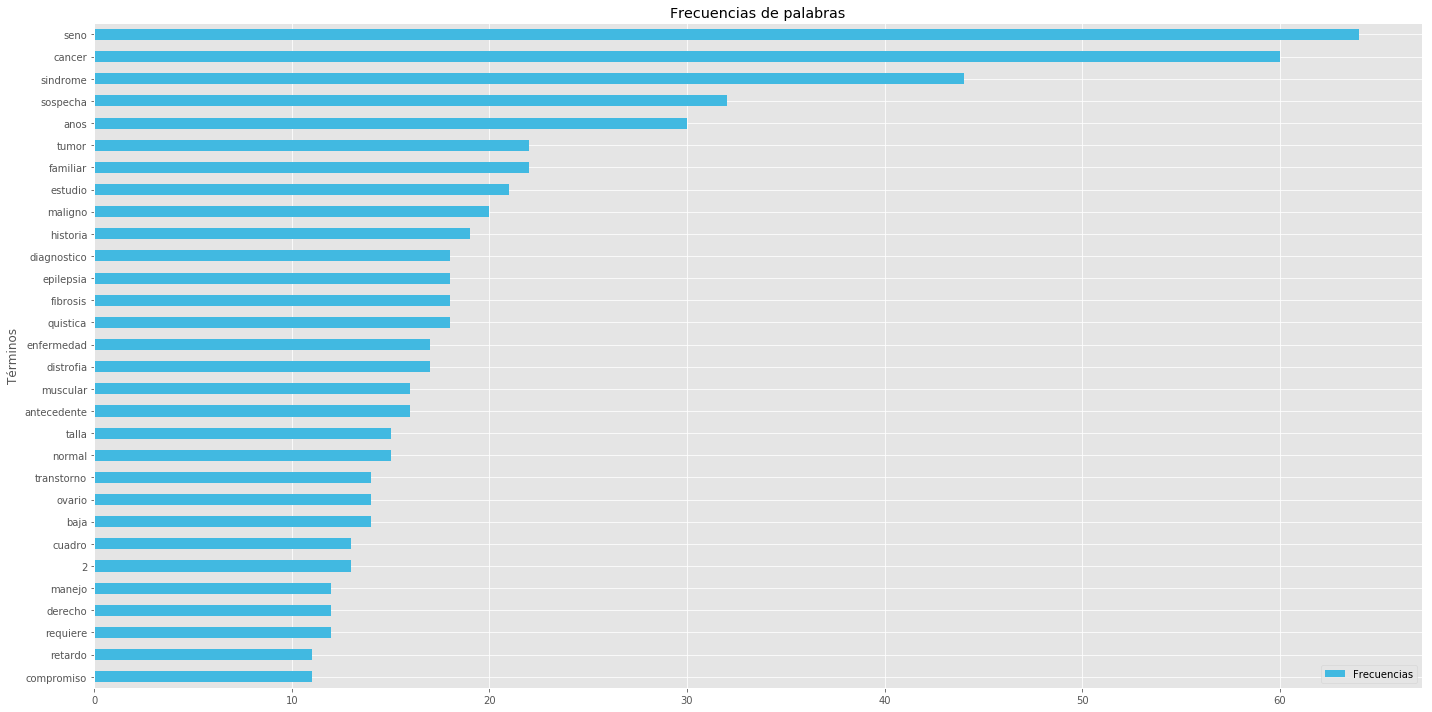

In [22]:
#plt.xkcd()
plot = frecuencias.plot(kind="barh", title = 'Frecuencias de palabras' , color = [('#41b9e1')],figsize=(20, 10));
fig = plot.get_figure();
fig.savefig("frecuecias.png", bbox_inches=0)

In [23]:
idf = pd.read_csv('idffrecuencias1.csv') #calculado con R
del idf['Unnamed: 0']

In [24]:
idf_plot = idf.sum()

In [25]:
idf_plot.head()

canalopatia       13.665780
clinico           45.229816
compatible        27.554810
consentimiento    18.743783
considera         41.966685
dtype: float64

In [26]:
IDF = pd.DataFrame({'Términos':idf_plot.index, 'frecuencias':idf_plot.values})
q = IDF.sort_values(by=['frecuencias'],ascending=[False]).set_index('Términos')
idf_p = q.head(30)
idf_p.head()

,frecuencias
Términos,
seno,168.134194
cancer,160.267675
sindrome,129.863166
anos,100.685753
sospecha,94.996892


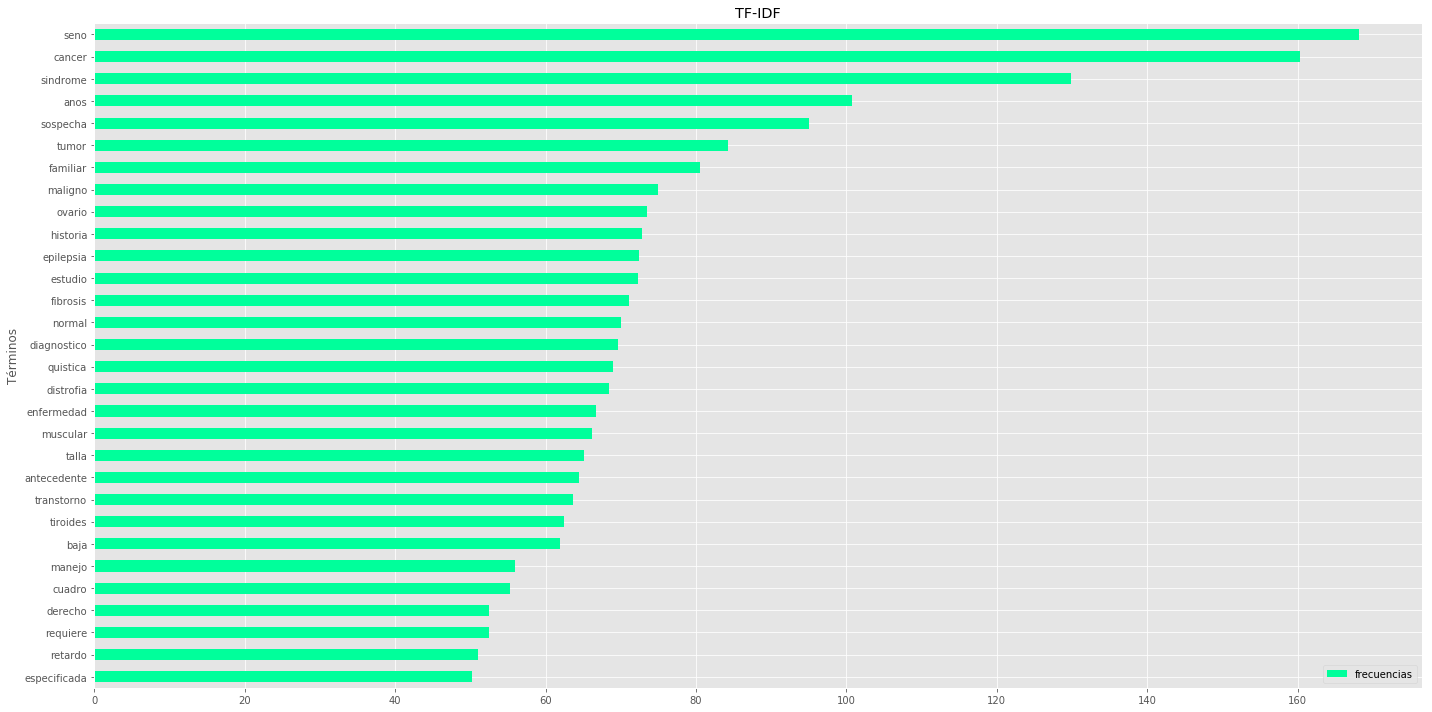

In [27]:
#plt.xkcd()
plot = idf_p.plot(kind="barh", title = 'TF-IDF' , color = [('#00FF9B')],figsize=(20, 10));
fig = plot.get_figure();
plt.gca().invert_yaxis();
fig.savefig("TFIDF1.png",bbox_inches=0)

In [28]:
idf1 = pd.read_csv('idffrecuencias1.csv') #calculado con R

In [29]:
idf1 = idf1.rename(columns={'Unnamed: 0': 'DOC'})
del idf1['DOC']
idf1.head()

,canalopatia,clinico,compatible,consentimiento,considera,crisis,cuadro,dravet,febriles,informado,...,prolapso,raiz,scrore,oesteogenesis,scna1,poliposico,querequirio,quimioterapia,resscion,sigmoide
0,6.83289,5.025535,5.510962,6.247928,4.662965,5.025535,4.247928,6.83289,6.247928,6.247928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.000000,0.000000,6.247928,0.000000,0.000000,0.000000,0.00000,0.000000,6.247928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.000000,0.000000,6.247928,0.000000,0.000000,0.000000,0.00000,0.000000,6.247928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.000000,0.000000,0.000000,0.000000,10.051070,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
mean_idf = idf1.mean(0)

In [31]:
mean_idf.head()

canalopatia       0.059938
clinico           0.198376
compatible        0.120854
consentimiento    0.082210
considera         0.184064
dtype: float64

In [32]:
resta = idf1 - mean_idf #Normalización entre cero y uno. Distancia de la media


In [33]:
norma = np.sqrt(np.diag(np.dot(idf1.T, idf1))) #calculo de la norma

Se calcula a partir de multiplicar la matriz transpuesta por si misma, esto proporciona una matriz cuadrada cuya diagonal esta formada por las normas al cuadrado, la raiz cuadrada de esta diagonal corresponde al vector de las normas de los campos de la matriz.

In [34]:
normalizado = idf1/norma

In [35]:
normalizado

,canalopatia,clinico,compatible,consentimiento,considera,crisis,cuadro,dravet,febriles,informado,...,prolapso,raiz,scrore,oesteogenesis,scna1,poliposico,querequirio,quimioterapia,resscion,sigmoide
0,0.707107,0.27735,0.447214,0.57735,0.333333,0.27735,0.258199,0.707107,0.57735,0.57735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.00000,0.000000,0.57735,0.000000,0.00000,0.000000,0.000000,0.00000,0.57735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.00000,0.000000,0.57735,0.000000,0.00000,0.000000,0.000000,0.00000,0.57735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.00000,0.000000,0.00000,0.000000,0.55470,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
normalizado.to_csv('normalizado1.csv', index= True)

In [37]:
comprobacion = np.sqrt(np.diag(np.dot(normalizado.T, normalizado))) # Comprobacion de la normlizacion......
comprobacion

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [38]:
labels = list(range(1, 229))

In [39]:
normalizado['DOC'] = labels

In [40]:
normalizado.set_index('DOC')

,canalopatia,clinico,compatible,consentimiento,considera,crisis,cuadro,dravet,febriles,informado,...,prolapso,raiz,scrore,oesteogenesis,scna1,poliposico,querequirio,quimioterapia,resscion,sigmoide
DOC,,,,,,,,,,,,,,,,,,,,,
1,0.707107,0.27735,0.447214,0.57735,0.333333,0.27735,0.258199,0.707107,0.57735,0.57735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.00000,0.000000,0.57735,0.000000,0.00000,0.000000,0.000000,0.00000,0.57735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.00000,0.000000,0.57735,0.000000,0.00000,0.000000,0.000000,0.00000,0.57735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.00000,0.000000,0.00000,0.000000,0.55470,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
#matrix = normalizado.as_matrix()
for n_clusters in range(2,11):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters,n_init=10)
    kmeans.fit(normalizado)
    clusters = kmeans.predict(normalizado)
    silhouette_avg = silhouette_score(normalizado, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

('For n_clusters =', 2, 'The average silhouette_score is :', 0.619843414763391)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.57732862815143016)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.55271179988691366)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.53444050396477361)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.5186238533008739)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.50584705244080874)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.49415990203499649)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.48221649263201105)
('For n_clusters =', 10, 'The average silhouette_score is :', 0.46976083007188268)


In [42]:
cluster_range = range(2, 11)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(normalizado)
    cluster_errors.append( clusters.inertia_ )

In [43]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,cluster_errors,num_clusters
0,248658.061033,2
1,111451.407305,3
2,63421.648097,4
3,41198.612618,5
4,29236.448471,6
5,21907.751162,7
6,17208.543852,8
7,13881.609243,9
8,11525.696279,10


In [44]:
clusters_df["cluster_errors"] = clusters_df["cluster_errors"]/10000
clusters_df

,cluster_errors,num_clusters
0,24.865806,2
1,11.145141,3
2,6.342165,4
3,4.119861,5
4,2.923645,6
5,2.190775,7
6,1.720854,8
7,1.388161,9
8,1.152570,10


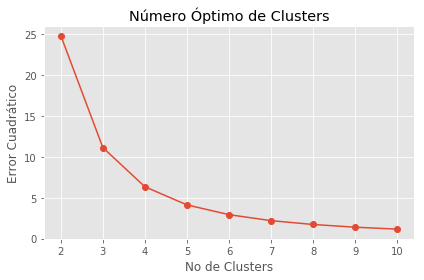

In [45]:
import sys
reload(sys)  
sys.setdefaultencoding('utf8')
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
fig = plt.figure()
plt.ylabel('Error Cuadrático')
plt.xlabel('No de Clusters')
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")
plt.title('Número Óptimo de Clusters')
fig.savefig('Clusters.png', dpi=fig.dpi)

In [46]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg <  0.5:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(normalizado)
    clusters = kmeans.predict(normalizado)
    silhouette_avg = silhouette_score(normalizado, clusters)
    
    #km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0
    #clusters = km.fit_predict(matrix)
    #silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

In [47]:
cluster_map = pd.DataFrame()
cluster_map['DOC'] = normalizado.index.values
cluster_map['cluster'] = kmeans.labels_
cluster_map['hc'] = df1['HC']
cluster_map

,DOC,cluster,hc
0,0,2,cuadro clinico compatible crisis febriles ...
1,1,2,sospecha craneosinostosis abombamiento fronta...
2,2,2,tumor maligno retina riesgo cardiovascula...
3,3,2,crisis compulsivas crisis supraversion ...
4,4,2,prueba complejo esclerosis tuberosa genes ...
5,5,2,sindrome hipermovilidad miopia degenerativa ...
6,6,2,fibrosis quistica
7,7,2,distrofia muscular progresiva estudio duchene...
8,8,2,evidencia retinoblatoma bilateral alta p...
9,9,2,agamaglobulinemia hereditaria bruton


In [48]:
cluster1_1 = cluster_map[cluster_map.cluster == 0]
cluster2_1 = cluster_map[cluster_map.cluster == 1]
cluster3_1 = cluster_map[cluster_map.cluster == 2]
cluster4_1 = cluster_map[cluster_map.cluster == 3]
cluster5_1 = cluster_map[cluster_map.cluster == 4]
cluster5_1.head()

,DOC,cluster,hc
93,93,4,sindrome nefrotico realizo depuracion cr...
94,94,4,sn1a canalapatia sodio
95,95,4,displasias esqueleticas
96,96,4,sindrome mielodisplasico recien nacido preterm...
97,97,4,cancer seno familar


In [49]:
#cluster_map['hc'] = df1['stimming']
#cluster_map.head()

In [50]:
cluster1 = cluster1_1['DOC'].values.tolist()
c1 = cluster_map[cluster_map['DOC'].isin(cluster1)]
c1.to_csv('cluster1.csv', index = False)
c1.head()

,DOC,cluster,hc
47,47,0,manchas cafe leche sospecha neurofibromatos...
48,48,0,sospecha enfermedad jarabe arce resu...
49,49,0,antecedentes cancer seno 5 hermanas cance...
50,50,0,tumor seno derecho carcinoma infiltrante...
51,51,0,genex fertilidad


In [51]:
cluster2 = cluster2_1['DOC'].values.tolist()
c2 = cluster_map[cluster_map['DOC'].isin(cluster2)]
c2.to_csv('cluster2.csv', index = False)
c2.head()

,DOC,cluster,hc
139,139,1,11 anos producto relacion consanguinea ...
140,140,1,transtorno conducta sociablem transtorno ...
141,141,1,gastritis cronicatumor maligno seno cancer ...
142,142,1,esclerosis neromuscular distrofia muscular ...
143,143,1,acidosis tubular renal distal ademas falla m...


In [52]:
cluster3 = cluster3_1['DOC'].values.tolist()
c3 = cluster_map[cluster_map['DOC'].isin(cluster3)]
c3.to_csv('cluster3.csv', index = False)
c3.head()

,DOC,cluster,hc
0,0,2,cuadro clinico compatible crisis febriles ...
1,1,2,sospecha craneosinostosis abombamiento fronta...
2,2,2,tumor maligno retina riesgo cardiovascula...
3,3,2,crisis compulsivas crisis supraversion ...
4,4,2,prueba complejo esclerosis tuberosa genes ...


In [53]:
cluster4 = cluster4_1['DOC'].values.tolist()
c4 = cluster_map[cluster_map['DOC'].isin(cluster4)]
c4.to_csv('cluster4.csv', index = False )
c4.head()

,DOC,cluster,hc
184,184,3,anemia hipocromatuca microcitica antecendete ...
185,185,3,sindrome ehlers danlos asintomatica habia v...
186,186,3,secuencion brca1 brca2 delecciones duplica...
187,187,3,diagnostico clinico homocistinuriadistimi...
188,188,3,esferocitosis hereditaria anemia especifi...


In [54]:
cluster5 = cluster5_1['DOC'].values.tolist()
c5 = cluster_map[cluster_map['DOC'].isin(cluster5)]
c5.to_csv('cluster5.csv', index = False)
c5.head()

,DOC,cluster,hc
93,93,4,sindrome nefrotico realizo depuracion cr...
94,94,4,sn1a canalapatia sodio
95,95,4,displasias esqueleticas
96,96,4,sindrome mielodisplasico recien nacido preterm...
97,97,4,cancer seno familar


In [55]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.spectral(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        plt.savefig('S.png', dpi=fig.dpi)

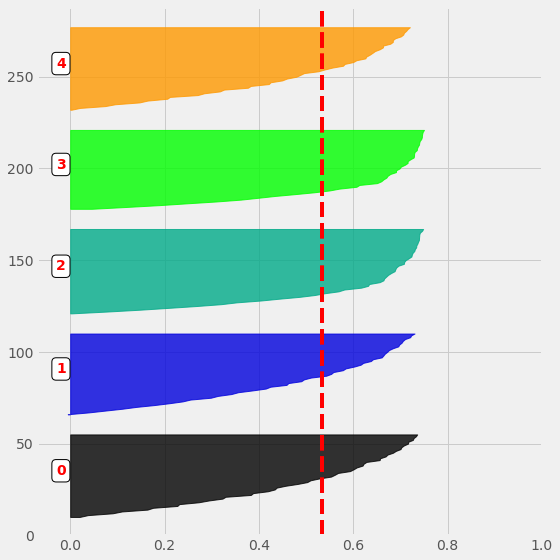

In [56]:
#plt.xkcd()
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(normalizado, clusters)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.07, 1], len(normalizado), sample_silhouette_values, clusters)

In [57]:
("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, kmeans.labels_))

'Homogeneity: 0.296'

In [58]:
("Completeness: %0.3f" % metrics.completeness_score(labels, kmeans.labels_))

'Completeness: 1.000'

In [59]:
("V-measure: %0.3f" % metrics.v_measure_score(labels, kmeans.labels_))

'V-measure: 0.457'

In [60]:
("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, kmeans.labels_))

'Adjusted Rand-Index: 0.000'

In [61]:
("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(normalizado, kmeans.labels_, sample_size=10000))

'Silhouette Coefficient: 0.534'

In [62]:
frames = [c1,c2,c3,c4,c5]

In [63]:
result = pd.concat(frames)

In [64]:
result.head()

,DOC,cluster,hc
47,47,0,manchas cafe leche sospecha neurofibromatos...
48,48,0,sospecha enfermedad jarabe arce resu...
49,49,0,antecedentes cancer seno 5 hermanas cance...
50,50,0,tumor seno derecho carcinoma infiltrante...
51,51,0,genex fertilidad


In [65]:
df.head()

,id,codigo,sexo,edad,HC
0,1,32244,M,2,cuadro clinico compatible crisis febriles ...
1,2,33254,F,0,sospecha craneosinostosis abombamiento fronta...
2,3,36954,F,0,tumor maligno retina riesgo cardiovascula...
3,4,35227,M,2,crisis compulsivas crisis supraversion ...
4,5,31156,F,8,prueba complejo esclerosis tuberosa genes ...


In [66]:
x = cluster_map[['DOC','cluster']]
y = df[['sexo','edad']]

In [67]:
result = pd.concat([x, y], axis=1)

In [68]:
result.head()

,DOC,cluster,sexo,edad
0,0,2,M,2
1,1,2,F,0
2,2,2,F,0
3,3,2,M,2
4,4,2,F,8


In [69]:
h1 = result[result.cluster == 0]

In [70]:
h1_1 = h1[h1.sexo == 'F']
h1_2 = h1[h1.sexo == 'M']
h1_3 = h1.edad.mean()
h1_3

22.065217391304348

In [71]:
f = [(len(h1_1),len(h1_2))]

In [72]:
labels = ['F', 'M']
des1 = pd.DataFrame.from_records(f, columns=labels)
des1

,F,M
0,29,17


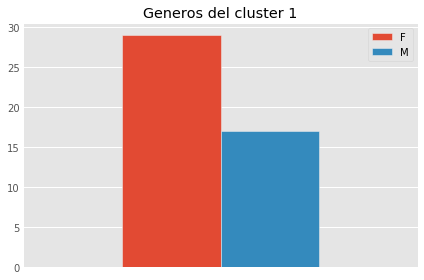

In [98]:
matplotlib.style.use('ggplot')
plot = des1.plot(kind="bar", title = 'Generos del cluster 1')
plot.axes.get_xaxis().set_visible(False)
fig = plot.get_figure()
fig.savefig("Cluster1G.png", bbox_inches=0)

In [74]:
h2 = result[result.cluster == 1]

In [75]:
h2_1 = h2[h2.sexo == 'F']
h2_2 = h2[h2.sexo == 'M']
h2_3 = h2.edad.mean()
h2_3

22.555555555555557

In [76]:
f2 = [(len(h2_1),len(h2_2))]

In [146]:
labels = ['F', 'M']
des2 = pd.DataFrame.from_records(f2, columns=labels)
des2

,F,M
0,27,18


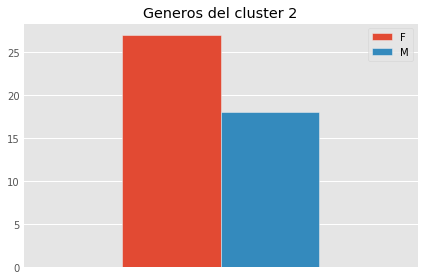

In [144]:
matplotlib.style.use('ggplot')
plot = des2.plot(kind="bar", title = 'Generos del cluster 2')
plot.axes.get_xaxis().set_visible(False)
fig = plot.get_figure()
fig.savefig("Cluster2G.png", bbox_inches=0)

In [111]:
h3 = result[result.cluster == 2]
h3.head()

,DOC,cluster,sexo,edad
0,0,2,M,2
1,1,2,F,0
2,2,2,F,0
3,3,2,M,2
4,4,2,F,8


In [106]:
h3_1 = h3[h3.sexo == 'F']
h3_2 = h3[h3.sexo == 'M']
h3_3 = h3.edad.mean()
h3_3

14.404255319148936

In [107]:
f3 = [(len(h3_1),len(h3_2))]

In [129]:
labels = ['F', 'M']
des3 = pd.DataFrame.from_records(f3, columns=labels)
des3

,F,M
0,24,23


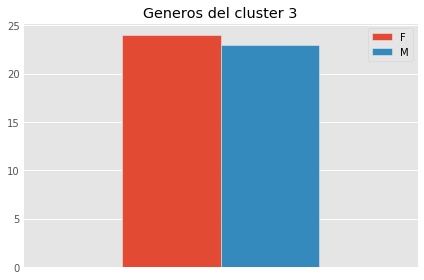

In [132]:
matplotlib.style.use('ggplot')
plot = des3.plot(kind="bar", title = 'Generos del cluster 3')
plot.axes.get_xaxis().set_visible(False)
fig = plot.get_figure()
fig.savefig("Cluster3G.png", bbox_inches=0)

In [147]:
h4 = result[result.cluster == 3]
h4.head()

,DOC,cluster,sexo,edad
184,184,3,M,39
185,185,3,F,25
186,186,3,F,70
187,187,3,F,29
188,188,3,M,16


In [148]:
h4_1 = h4[h4.sexo == 'F']
h4_2 = h4[h4.sexo == 'M']
h4_3 = h4.edad.mean()
h4_3

24.227272727272727

In [149]:
f4 = [(len(h4_1),len(h4_2))]

In [150]:
labels = ['F', 'M']
des4 = pd.DataFrame.from_records(f3, columns=labels)
des4

,F,M
0,24,23


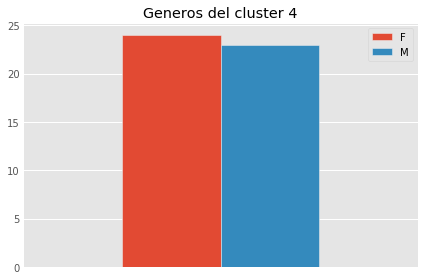

In [151]:
matplotlib.style.use('ggplot')
plot = des4.plot(kind="bar", title = 'Generos del cluster 4')
plot.axes.get_xaxis().set_visible(False)
fig = plot.get_figure()
fig.savefig("Cluster4G.png", bbox_inches=0)

In [138]:
h5 = result[result.cluster == 4]
h5.head()

,DOC,cluster,sexo,edad
93,93,4,M,5
94,94,4,F,2
95,95,4,F,2
96,96,4,M,0
97,97,4,F,39


In [139]:
h5_1 = h5[h5.sexo == 'F']
h5_2 = h5[h5.sexo == 'M']
h5_3 = h5.edad.mean()
h5_3

20.41304347826087

In [140]:
f5 = [(len(h5_1),len(h5_2))]

In [141]:
labels = ['F', 'M']
des5 = pd.DataFrame.from_records(f5, columns=labels)
des5

,F,M
0,26,20


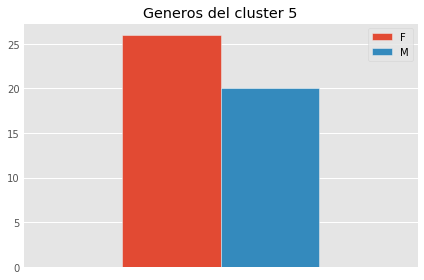

In [142]:
matplotlib.style.use('ggplot')
plot = des5.plot(kind="bar", title = 'Generos del cluster 5')
plot.axes.get_xaxis().set_visible(False)
fig = plot.get_figure()
fig.savefig("Cluster5G.png", bbox_inches=0)

In [80]:
result.to_csv('weka.csv', index = False)

In [81]:
genes = pd.read_csv('genes.csv')

In [82]:
genes

,id,cromosoma,gen,pos_inicio,pos_fin,ref,alt,referencia_cambioAA,homocigoto,paciente_id,funcion_gen_ref,tipo_variante,clinvar_sig
0,1,chr1,AGRN,979748,979748,A,T,AGRN:exon12:c.A2183T:p.E728V,0,1,exonic,nonsynonymous SNV,non-pathogenic
1,2,chr1,AGRN,981931,981931,A,G,AGRN:exon18:c.A3066G:p.S1022S,1,1,exonic,synonymous SNV,non-pathogenic
2,3,chr1,AGRN,982994,982994,T,C,AGRN:exon21:c.T3558C:p.F1186F,1,1,exonic,synonymous SNV,non-pathogenic
3,4,chr1,"CDK11A,CDK11B",1650845,1650845,G,A,CDK11A:exon4:c.C277T:p.R93W\nCDK11B:exon4:c.C2...,0,1,exonic,nonsynonymous SNV,NaN
4,5,chr1,GABRD,1957037,1957037,T,C,GABRD:exon4:c.T330C:p.G110G,0,1,exonic,synonymous SNV,NaN
5,6,chr1,PEX10,2340200,2340200,T,C,PEX10:exon3:c.A291G:p.T97T,1,1,exonic,synonymous SNV,probable-non-pathogenic
6,7,chr1,MMEL1,2560882,2560882,G,A,MMEL1:exon2:c.C42T:p.A14A,1,1,exonic,synonymous SNV,NaN
7,8,chr1,TP73,3638674,3638674,C,T,TP73:exon3:c.C306T:p.T102T\nTP73:exon3:c.C372T...,1,1,exonic,synonymous SNV,NaN
8,9,chr1,KCNAB2,6158562,6158562,A,G,KCNAB2:exon14:c.A831G:p.S277S\nKCNAB2:exon15:c...,1,1,exonic,synonymous SNV,NaN
9,10,chr1,PLEKHG5,6528589,6528589,C,T,PLEKHG5:exon20:c.G2307A:p.T769T\nPLEKHG5:exon2...,0,1,exonic,synonymous SNV,NaN


In [83]:
genes1 = genes[['paciente_id','cromosoma','gen','homocigoto','tipo_variante','clinvar_sig']]

In [84]:
genes1.head()

,paciente_id,cromosoma,gen,homocigoto,tipo_variante,clinvar_sig
0,1,chr1,AGRN,0,nonsynonymous SNV,non-pathogenic
1,1,chr1,AGRN,1,synonymous SNV,non-pathogenic
2,1,chr1,AGRN,1,synonymous SNV,non-pathogenic
3,1,chr1,"CDK11A,CDK11B",0,nonsynonymous SNV,NaN
4,1,chr1,GABRD,0,synonymous SNV,NaN


In [85]:
genes1.to_csv('idgenes.csv', index = False)

In [86]:
r = pd.read_csv('idgenes.csv')
r.head()

,paciente_id,cromosoma,gen,homocigoto,tipo_variante,clinvar_sig
0,1,chr1,AGRN,0,nonsynonymous SNV,non-pathogenic
1,1,chr1,AGRN,1,synonymous SNV,non-pathogenic
2,1,chr1,AGRN,1,synonymous SNV,non-pathogenic
3,1,chr1,"CDK11A,CDK11B",0,nonsynonymous SNV,NaN
4,1,chr1,GABRD,0,synonymous SNV,NaN


In [87]:
o = r['paciente_id'].values.tolist()
o1 = df[df['id'].isin(o)]
o

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [88]:
keys = o
values = range(1,228)
dictionary = dict(zip(keys, values))
dictionary

{1: 227}

In [89]:
genes1['paciente_id'].map(dictionary)
genes1['paciente_id'] = genes1['paciente_id'].map(dictionary)

In [90]:
P =genes1[genes1.paciente_id == 1]
P.head()

,paciente_id,cromosoma,gen,homocigoto,tipo_variante,clinvar_sig


In [91]:
P.to_csv('paciente1.csv', index = False)

In [92]:
genes1.to_csv('weka1.csv', index = False)

In [93]:
dist = cosine_similarity(normalizado)

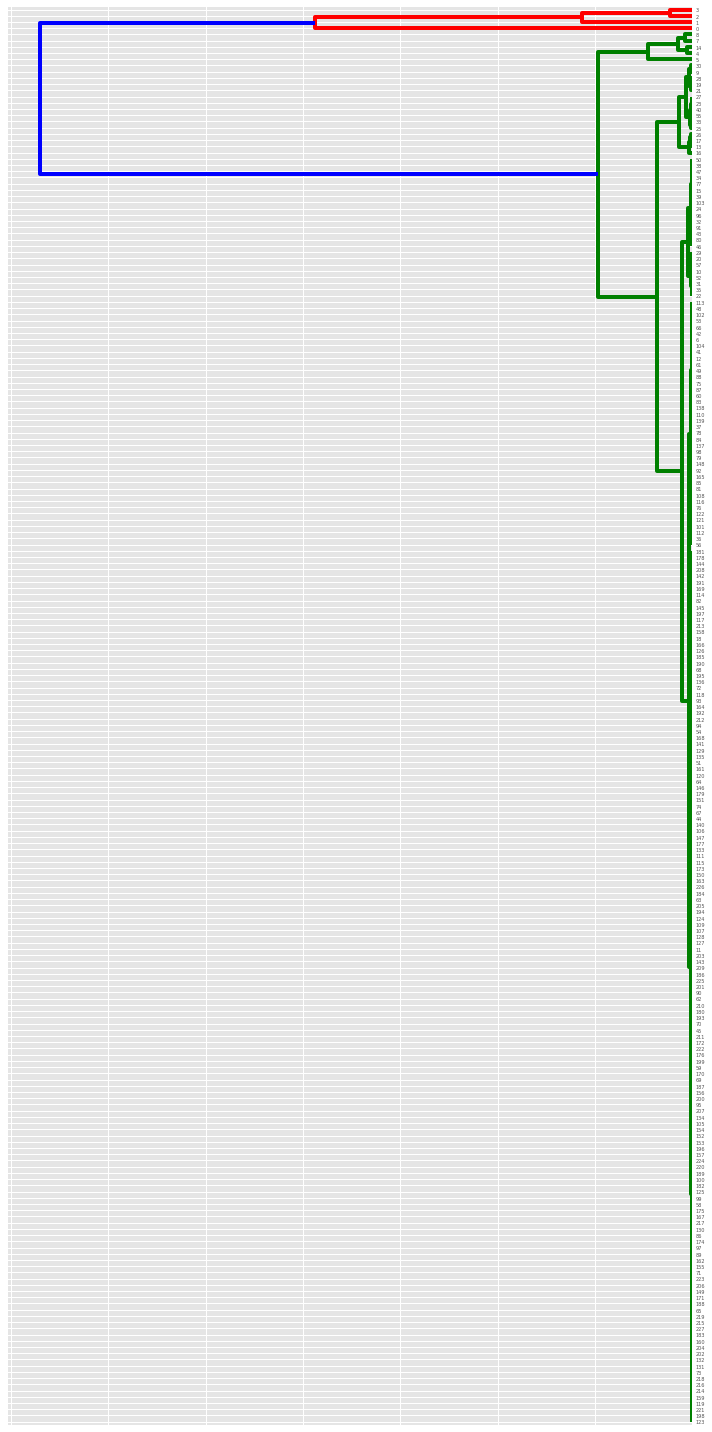

In [94]:
from scipy.cluster.hierarchy import ward, dendrogram
dist = cosine_similarity(normalizado)
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances\n",
fig, ax = plt.subplots(figsize=(10, 20)) # set size\n",
ax = dendrogram(linkage_matrix, orientation="left");
plt.tick_params(axis= 'x',          # changes apply to the x-axis\n",
                which='both',      # both major and minor ticks are affected\n",
                bottom='off',      # ticks along the bottom edge are off\n",
                top='off',         # ticks along the top edge are off\n",
                labelbottom='off'),
plt.tight_layout() #show plot with tight layout\n",
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters"